# **Data** **Visualization** **and** **Pre**-**processing**

1. **Download** **the** **dataset**: **Dataset** 
2. **Load** **the** **dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv("C:/Users/shashank/OneDrive/Desktop/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


 3.**Perform** **Below** **Visualizations**

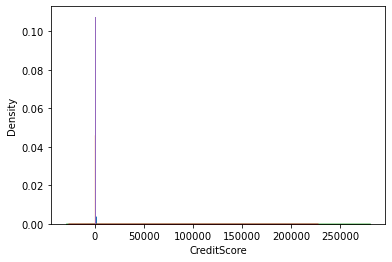

In [2]:
sns.kdeplot(data['CreditScore'], shade=True)
sns.kdeplot(data['Age'], shade=True)
sns.kdeplot(data['Balance'], shade=True)
sns.kdeplot(data['EstimatedSalary'], shade=True)
sns.kdeplot(data['Tenure'], shade=True)
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()
for column in ['CreditScore','Age','Balance','EstimatedSalary','Tenure']:
    data[column] = stand.fit_transform(data[column].values.reshape(-1,1))

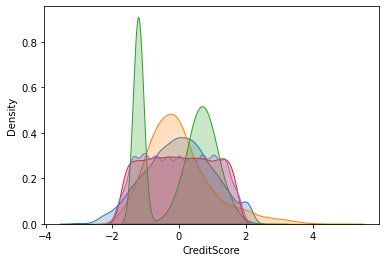

In [4]:
sns.kdeplot(data['CreditScore'], shade=True)
sns.kdeplot(data['Age'], shade=True)
sns.kdeplot(data['Balance'], shade=True)
sns.kdeplot(data['EstimatedSalary'], shade=True)
sns.kdeplot(data['Tenure'], shade=True)
plt.show()

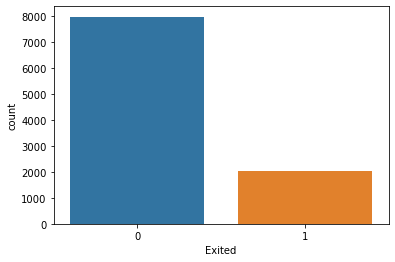

In [5]:
sns.countplot(data['Exited'])
plt.show()

4. **Perform** **descriptive** **statistics** **on** **the** **dataset**

In [36]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000
mean,5000.50000,1.569094e+07,-4.824585e-16,2.318146e-16,-1.078249e-16,-6.252776e-17,1.530200,0.70550,0.515100,-2.877698e-17,0.203700
std,2886.89568,7.193619e+04,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.581654,0.45584,0.499797,1.000050e+00,0.402769
min,1.00000,1.556570e+07,-3.109504e+00,-1.994969e+00,-1.733315e+00,-1.225848e+00,1.000000,0.00000,0.000000,-1.740268e+00,0.000000
25%,2500.75000,1.562853e+07,-6.883586e-01,-6.600185e-01,-6.959818e-01,-1.225848e+00,1.000000,0.00000,0.000000,-8.535935e-01,0.000000
50%,5000.50000,1.569074e+07,1.522218e-02,-1.832505e-01,-4.425957e-03,3.319639e-01,1.000000,1.00000,1.000000,1.802807e-03,0.000000
75%,7500.25000,1.575323e+07,6.981094e-01,4.842246e-01,6.871299e-01,8.199205e-01,2.000000,1.00000,1.000000,8.572431e-01,0.000000
max,10000.00000,1.581569e+07,2.063884e+00,5.061197e+00,1.724464e+00,2.795323e+00,4.000000,1.00000,1.000000,1.737200e+00,1.000000


5 .**Handle the Missing values**

In [8]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

 6.**Find** **the** **outliers** **and** **replace** **the** **outliers**

In [41]:
lowerlimit=data['Age'].quantile(0.05)
lowerlimit
data[data['Age']<lowerlimit]
upperlimit=data['Age'].quantile(0.95)
upperlimit
data[data['Age']<upperlimit]
data=data[(data['Age']>lowerlimit)&(data['Age']<upperlimit)]
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


 7.**Check** **for** **Categorical** **columns** **and** **perform** **encoding**

In [26]:
x = pd.get_dummies(x)

x.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,Surname_Abazu,Surname_Abbie,Surname_Abbott,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,-0.326221,0.293517,-1.041760,-1.225848,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,2,15647311,-0.440036,0.198164,-1.387538,0.117350,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,3,15619304,-1.536794,0.293517,1.032908,1.333053,3,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,4,15701354,0.501521,0.007457,-1.387538,-1.225848,2,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,5,15737888,2.063884,0.388871,-1.041760,0.785728,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


8.**Split** **the** **data** **into** **dependent** **and** **independent** **variables**

In [22]:
x = data.iloc[:,0:10]
y = data.iloc[:,10]

print(x.shape)
print(y.shape)


(10000, 10)
(10000,)


9.**Scale** **the** **independent** **variables** 

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=0)
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943
0,-0.702176,-1.343330,-0.735507,0.015266,0.008860,0.673160,2.535034,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,-1.015588,1.760216,-0.574682,1.087261,-1.087261
1,-1.485722,1.558330,1.024427,-0.652609,0.008860,-1.207724,0.804242,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,0.984651,-0.568112,-0.574682,1.087261,-1.087261
2,-0.524522,-0.655156,0.808295,-0.461788,1.393293,-0.356937,0.804242,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,-1.015588,-0.568112,1.740094,1.087261,-1.087261
3,-1.167396,1.200594,0.396614,-0.080145,0.008860,-0.009356,-0.926551,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,-1.015588,-0.568112,1.740094,-0.919743,0.919743
4,-1.451159,0.778798,-0.467915,1.255605,0.701077,-1.207724,0.804242,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,0.984651,-0.568112,-0.574682,-0.919743,0.919743


 10.**Split** **the** **data** **into** **training** **and** **testing**

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=0)
print(' x_train.shape : ',x_train.shape)
print(' y_train.shape : ',y_train.shape)
print(' x_test.shape : ',x_test.shape)
print(' y_test.shape : ',y_test.shape)

 x_train.shape :  (7500, 10)
 y_train.shape :  (7500,)
 x_test.shape :  (2500, 10)
 y_test.shape :  (2500,)
